In [ ]:
!pip install -q global-chem[forcefields] --upgrade
!rm -rf global-chem/
!git clone https://github.com/Sulstice/global-chem

     |████████████████████████████████| 71 kB 3.3 MB/s 
     |████████████████████████████████| 22.5 MB 1.1 MB/s 
     |████████████████████████████████| 61 kB 421 kB/s 
Cloning into 'global-chem'...
remote: Enumerating objects: 3658, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 3658 (delta 183), reused 134 (delta 112), pack-reused 3437
Receiving objects: 100% (3658/3658), 47.21 MiB | 20.99 MiB/s, done.
Resolving deltas: 100% (2186/2186), done.
Checking out files: 100% (447/447), done.


In [ ]:
from global_chem_extensions import GlobalChemExtensions

ff = GlobalChemExtensions().forcefields()

In [ ]:
# Load the Molecule

global_chem_molecule = ff.initialize_globalchem_molecule(
    'FC(F)(C(F)(C(O)=O)F)C(F)(F)F',
    stream_file='global-chem/example_data/forcefield_parameterization/perfluorobutanoic_acid.str',
    # frcmod_file='gaff2.frcmod',
)

print (global_chem_molecule)

In [ ]:
# Determine the Name

global_chem_molecule.determine_name()
name = global_chem_molecule.name
print (name)

perfluorobutanoic acid


In [ ]:
attributes = global_chem_molecule.get_attributes()
for k, v in attributes.items():
  print (f'{k}: {v}')

name: perfluorobutanoic acid
smiles: FC(F)(C(F)(C(O)=O)F)C(F)(F)F
molecular_weight: 213.986476812
logp: 1.9039000000000001
h_bond_donor: 1
h_bond_acceptors: 1
rotatable_bonds: 2
number_of_atoms: 13
molar_refractivity: 23.5848
topological_surface_area_mapping: 37.3
formal_charge: 0
heavy_atoms: 13
num_of_rings: 0


In [ ]:
# Conversion to other Subset SMILES Languages

pysmiles_mol = global_chem_molecule.get_pysmiles()
rdkit_mol = global_chem_molecule.get_rdkit_molecule()
partial_smiles_mol = global_chem_molecule.get_partial_smiles()
deep_smiles_mol = global_chem_molecule.encode_deep_smiles()
selfies_mol = global_chem_molecule.encode_selfies()
validate_smiles = global_chem_molecule.validate_molvs()

print ("RDKit Mol: %s" % rdkit_mol)
print ("PySMILES: %s" % pysmiles_mol)
print ("Partial SMILES: %s" % partial_smiles_mol)
print ("DeepSMILES: %s" % deep_smiles_mol)
print ("Selfies Mol: %s" % selfies_mol)
print ("Validation: %s" % validate_smiles)

RDKit Mol: <rdkit.Chem.rdchem.Mol object at 0x7f93bd602760>
PySMILES: Graph with 13 nodes and 12 edges
Partial SMILES: Molecule(atoms=['Atom(elem=9,chg=0,idx=0)', 'Atom(elem=6,chg=0,idx=1)', 'Atom(elem=9,chg=0,idx=2)', 'Atom(elem=6,chg=0,idx=3)', 'Atom(elem=9,chg=0,idx=4)', 'Atom(elem=6,chg=0,idx=5)', 'Atom(elem=8,chg=0,idx=6)', 'Atom(elem=8,chg=0,idx=7)', 'Atom(elem=9,chg=0,idx=8)', 'Atom(elem=6,chg=0,idx=9)', 'Atom(elem=9,chg=0,idx=10)', 'Atom(elem=9,chg=0,idx=11)', 'Atom(elem=9,chg=0,idx=12)'])
DeepSMILES: FCF)CF)CO)=O))F))CF)F)F
Selfies Mol: [F][C][Branch1][C][F][Branch1][=N][C][Branch1][C][F][Branch1][=Branch1][C][Branch1][C][O][=O][F][C][Branch1][C][F][Branch1][C][F][F]
Validation: []


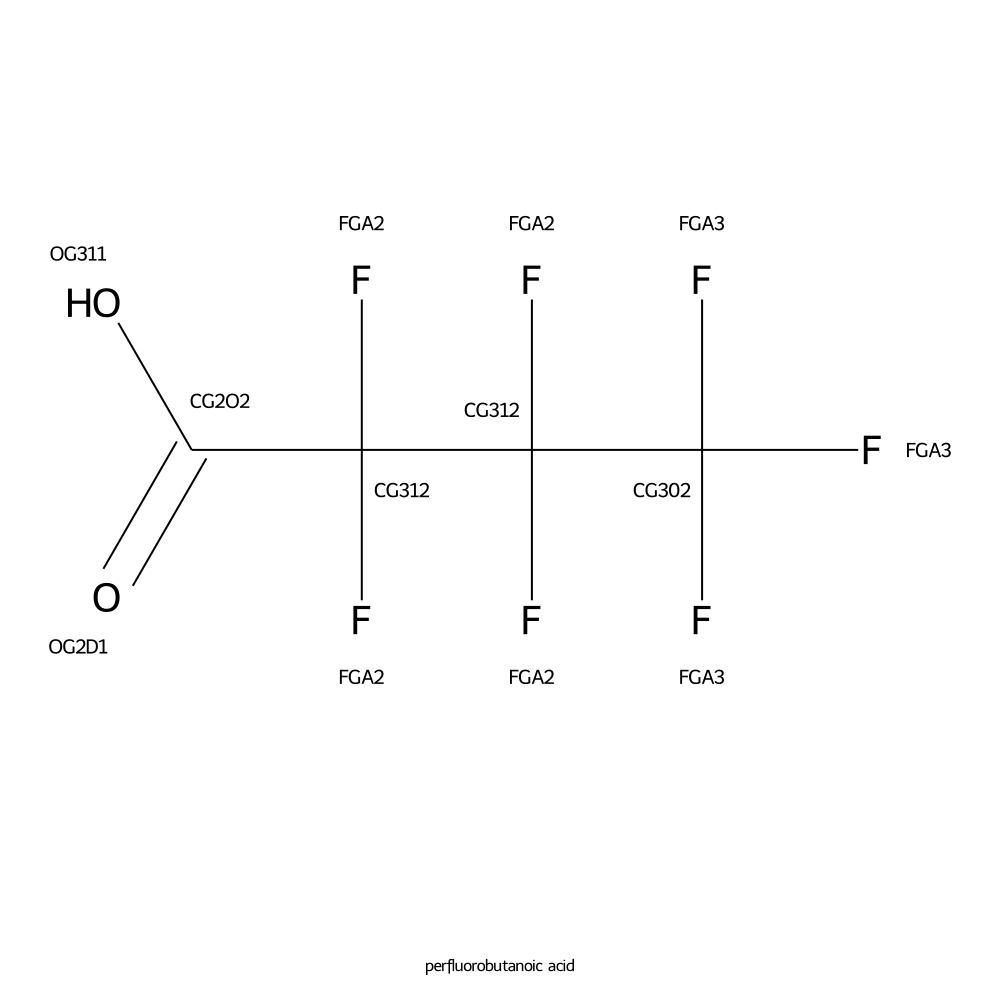

In [ ]:
global_chem_molecule.draw_cgenff_molecule(
    height=1000, 
    width=1000
 )

In [ ]:
# Create a CX SMILES between SMILES and the CGenFF Atom Types

print (global_chem_molecule.get_cgenff_cxsmiles())

O=C(O)C(F)(F)C(F)(F)C(F)(F)F |atomProp:0.atom_type.OG2D1:0.atom_idx.7:1.atom_type.CG2O2:1.atom_idx.5:2.atom_type.OG311:2.atom_idx.6:3.atom_type.CG312:3.atom_idx.3:4.atom_type.FGA2:4.atom_idx.4:5.atom_type.FGA2:5.atom_idx.8:6.atom_type.CG312:6.atom_idx.1:7.atom_type.FGA2:7.atom_idx.0:8.atom_type.FGA2:8.atom_idx.2:9.atom_type.CG302:9.atom_idx.9:10.atom_type.FGA3:10.atom_idx.10:11.atom_type.FGA3:11.atom_idx.11:12.atom_type.FGA3:12.atom_idx.12|
